In [22]:
#FASHION MNIST  

In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [24]:
mnist = tf.keras.datasets.fashion_mnist

In [25]:
#import data and segrigate as training and testing data
(training_images, training_lables), (test_images, test_lables) = mnist.load_data()

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

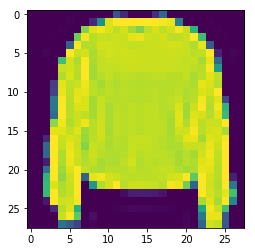

In [26]:
plt.imshow(training_images[7])   #shows the picture
print(training_images[7])        #shows pixel array
print(training_lables[7])

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.12):
      print("\nReached 88% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [28]:
#You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:
training_images= training_images/255.0
test_images= test_images/255.0

In [29]:
#Creating model
#784(28*28 flattened) - 128(hidden layer) - 10(output coz you have 10 labels)
model = tf.keras.Sequential([ tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(units=1028, activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)])

In [30]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer = 'Adam', metrics=['accuracy'])

In [31]:
model.fit(training_images , training_lables , epochs=5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.4789 - acc: 0.8262
Epoch 2/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.3648 - acc: 0.8665
Epoch 3/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.3261 - acc: 0.8788
Epoch 4/5
60000/60000 [==============================] - 67s 1ms/sample - loss: 0.3029 - acc: 0.8868
Epoch 5/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.2852 - acc: 0.8944


In [32]:
model.evaluate(test_images, test_lables)

10000/10000 [==============================] - 3s 296us/sample - loss: 0.3467 - acc: 0.8763


[0.3467424947500229, 0.8763]

6
[6.0769827e-07 4.7421262e-14 3.0405786e-06 4.8457229e-09 9.2744180e-05
 1.7325531e-18 9.9990356e-01 5.2063652e-23 1.4374430e-12 2.0029380e-19]


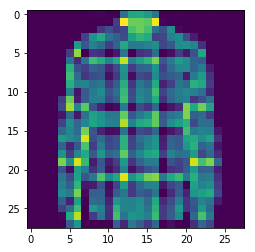

In [33]:
plt.imshow(test_images[7])
classification= model.predict(test_images)
print(test_lables[7])
print(classification[7])